In [47]:
import cv2
import imutils
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

img = cv2.imread(r"licensed_car109.jpeg",cv2.IMREAD_COLOR)
img = cv2.resize(img, (600,400) )

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.bilateralFilter(gray, 13, 15, 15) 

In [48]:
gray

array([[  2,   2,   2, ..., 174, 174, 174],
       [  2,   2,   2, ..., 175, 175, 175],
       [  2,   2,   2, ..., 177, 176, 176],
       ...,
       [146, 146, 145, ...,  23,  24,  24],
       [145, 145, 145, ...,  24,  24,  24],
       [146, 145, 145, ...,  24,  24,  24]], dtype=uint8)

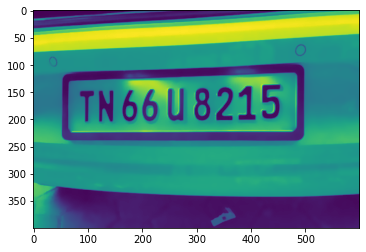

In [49]:
plt.imshow(gray)

In [50]:
edged = cv2.Canny(gray, 30, 200) 

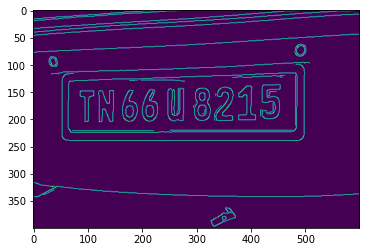

In [51]:
plt.imshow(edged)

In [52]:
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

In [54]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

In [55]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [56]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

In [57]:
Cropped

array([[ 10,  10,  10, ..., 125, 102,  53],
       [  9,   9,   9, ..., 138, 111,  66],
       [  8,   8,   8, ..., 140, 116,  71],
       ...,
       [ 32,  33,  36, ...,  29,  28,  28],
       [ 34,  34,  36, ...,  29,  28,  28],
       [ 35,  35,  36, ...,  28,  28,  28]], dtype=uint8)

In [58]:
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("programming_fever's License Plate Recognition\n")
print("Detected license plate Number is:",text)
img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
cv2.imshow('car',img)
cv2.imshow('Cropped',Cropped)

cv2.waitKey(0)
cv2.destroyAllWindows()

programming_fever's License Plate Recognition

Detected license plate Number is: TN66U8215


